# Machine Learning framework for network attack detection

Part III 

## Achievement:

|Model|Recall|Precision|F1|
|-----|---------|------|--|
|Support Vector Machine|0.95|0.95|0.95|
|Naive Bayes|0.79|0.78|0.76|
|Random Forest|**0.97**|0.97|0.96|
|Gradient Boost|0.88|0.88|0.78|
|Decision Tree|**0.97**|0.97|0.97|
|Xgboost|**0.97**|0.97|0.97|


I will present the analysis of 6 machine learning algorithms with the help of [CICIDS-2018 Dataset](https://www.unb.ca/cic/datasets/ids-2018.html): 

- Support Vector Machine (SVM)
- Decision Tree
- Naive Bayes
- Random Forest 
- Gradient Boosting
- Xgboost 

In [59]:
# import required libraries 
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import time
import glob
import os 
import re

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import collections
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
#path = r"E:\Juypter-files\dataset1_LOCAL_DATA"

# prepare the document 

In [3]:
#path1 = r"E:\Juypter-files\dataset1_LOCAL_DATA\csv_files"

In [4]:
path = r"/media/upm/New Volume/project/0/processed"

In [5]:
types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

In [6]:
csv = glob.glob(os.path.join(path , '*.csv'))
df = pd.concat((pd.read_csv(f, dtype=types) for f in csv))

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dst_port,16232943.0,9.164073e+03,1.892224e+04,0.000000e+00,53.0,80.0,3389.0,6.553500e+04
protocol,16232943.0,8.754113e+00,4.920117e+00,0.000000e+00,6.0,6.0,17.0,1.700000e+01
flow_duration,16232943.0,1.181380e+07,4.940124e+08,-9.190110e+11,492.0,20970.0,3002115.5,1.200000e+08
tot_fwd_pkts,16232943.0,2.353319e+01,1.521137e+03,1.000000e+00,1.0,2.0,5.0,3.096290e+05
tot_bwd_pkts,16232943.0,6.312706e+00,1.640256e+02,0.000000e+00,0.0,1.0,4.0,1.231180e+05
...,...,...,...,...,...,...,...,...
active_min,16232943.0,1.154657e+05,2.114145e+06,0.000000e+00,0.0,0.0,0.0,1.140000e+08
idle_mean,16232943.0,4.977256e+06,2.628760e+08,0.000000e+00,0.0,0.0,0.0,3.955714e+11
idle_std,16232943.0,2.856445e+05,1.691808e+08,0.000000e+00,0.0,0.0,0.0,2.622479e+11
idle_max,16232943.0,5.428144e+06,6.253704e+08,0.000000e+00,0.0,0.0,0.0,9.797810e+11


In [8]:
df.isnull().any().any()

True

In [9]:
# Replace Inf values with NaN
df = df.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
df = df.dropna()
# Double check these are all gone
df.isnull().any().any()

False

In [10]:
# Distribution of Dataset
df['label'].value_counts()

Benign                      13390249
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193354
SSH-Bruteforce                187589
Infilteration                 160639
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: label, dtype: int64

In [11]:
df['label'].value_counts()

Benign                      13390249
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193354
SSH-Bruteforce                187589
Infilteration                 160639
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: label, dtype: int64

In [12]:
# delet all binary labels 
df = df.loc[df["label"]  != 'Benign' ]

In [13]:
df['label_cat'] = df.label.astype('category').cat.codes
#df['label_is_attack'] = (df.label != 'Benign').astype('int')

# attack class distrbuation in the dataset 

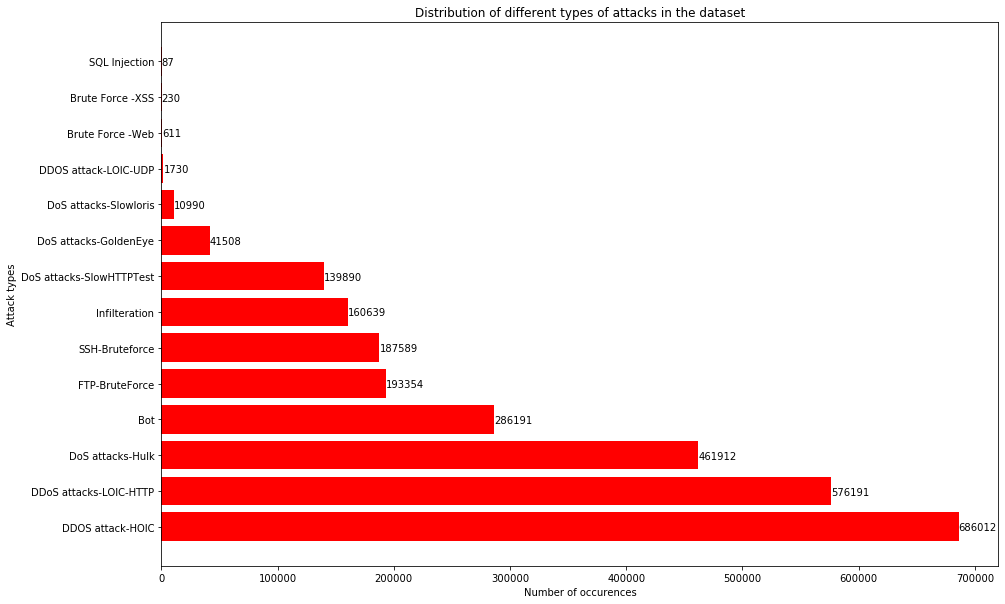

In [14]:
plt.figure(figsize=(15,10))

attack = ('DDOS attack-HOIC', 'DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk' , 'Bot' , 'FTP-BruteForce' , 'SSH-Bruteforce' , 'Infilteration' ,'DoS attacks-SlowHTTPTest' ,'DoS attacks-GoldenEye','DoS attacks-Slowloris','DDOS attack-LOIC-UDP' , 'Brute Force -Web' ,'Brute Force -XSS', 'SQL Injection')
y_pos = np.arange(len(attack)) 
amount = df['label'].value_counts()[:]
plt.barh(y_pos, amount, align='center' , color='#FF0000')
# color='#FF0000'
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

In [15]:
# 3 Different labeling options
attacks = ['label', 'label_cat']

# xs=feature vectors, ys=labels
x = df.drop(attacks, axis=1)
y = df['label_cat']

In [16]:
x = x.drop(columns=['timestamp', 'dst_port'])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [18]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['bwd_psh_flags',
 'bwd_urg_flags',
 'fwd_byts_b_avg',
 'fwd_pkts_b_avg',
 'fwd_blk_rate_avg',
 'bwd_byts_b_avg',
 'bwd_pkts_b_avg',
 'bwd_blk_rate_avg']

In [19]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
df_copy = df.drop(to_drop, axis=1)

# data normalization

In [20]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
#pd.Series(x_train.flatten()).describe()

# Kbest features 

In [21]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(x_train, y_train)

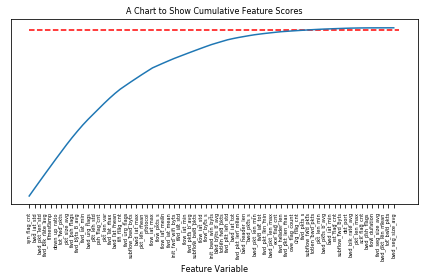

In [22]:
# sort the features by importance score
feature_importances = zip(df.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
#plt.figure(figsize=(500,200))
plt.tight_layout()

In [23]:
# perform selectkbest with k=40
features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)

In [24]:
new_features = df_copy.columns[features.get_support(indices=True)]

In [25]:
new_features

Index(['protocol', 'timestamp', 'tot_fwd_pkts', 'totlen_fwd_pkts',
       'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_std', 'flow_byts_s',
       'flow_pkts_s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'fwd_psh_flags', 'fwd_header_len', 'bwd_header_len',
       'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'urg_flag_cnt', 'fwd_seg_size_avg', 'bwd_seg_size_avg',
       'subflow_bwd_pkts', 'subflow_bwd_byts', 'init_fwd_win_byts',
       'init_bwd_win_byts', 'active_max', 'active_min', 'idle_mean',
       'idle_std'],
      dtype='object')

# 1- SVM

In [83]:
classifier = LinearSVC()

In [84]:
# fit the model
classifier.fit(x_train, y_train)

LinearSVC()

In [85]:
# predict validation
y_pred_SVM = classifier.predict(x_test)


In [66]:
confusion_svm_1 = pd.crosstab(y_test, y_predicted)
confusion_svm_1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
label_cat,,,,,,,,,,,,,,
0,57170,0,0,0,0,0,0,0,0,0,0,68,0,0
1,21,28,1,0,0,1,0,0,0,0,0,70,1,0
2,22,0,0,0,0,0,0,0,0,0,0,24,0,0
3,0,0,0,137184,0,0,0,0,0,0,0,19,0,0
4,0,0,0,0,322,19,0,0,0,0,0,5,0,0
5,895,0,0,0,123,114209,0,0,0,0,0,11,0,0
6,1,0,0,0,0,20,7461,503,0,6,0,87,0,224
7,0,0,0,0,0,0,1,92378,0,0,0,3,0,0
8,0,0,0,0,0,0,0,0,15249,0,12729,0,0,0


/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


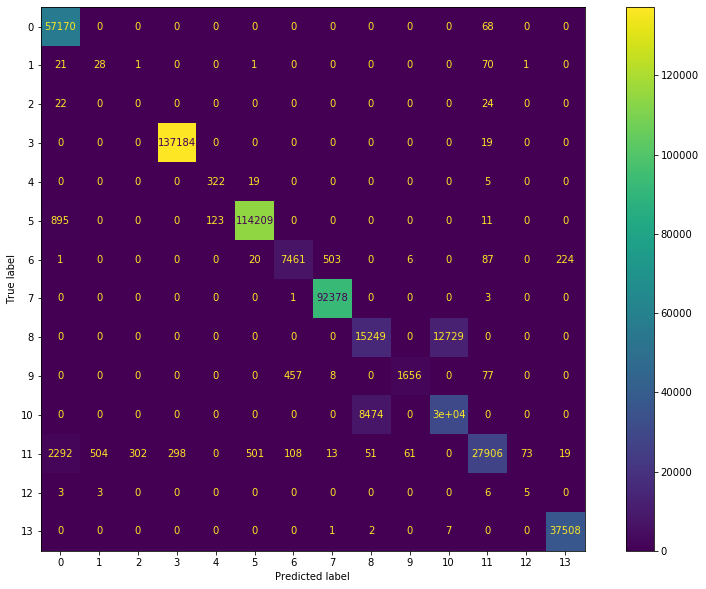

In [86]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = plot_confusion_matrix(classifier , x_test , y_test , ax=ax)

plt.show(matrix)
plt.show()

In [ ]:
matrix = plot_confusion_matrix(cls_forest , X_testh , y_test)

plt.show(matrix)
plt.show()

In [87]:
precision, recall, fscore, support = score(y_test, y_pred_SVM)

d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}

In [88]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DDOS attack-HOIC,0.946460,0.998812,0.971932
1,DDoS attacks-LOIC-HTTP,0.052336,0.229508,0.085236
2,DoS attacks-Hulk,0.000000,0.000000,0.000000
3,Bot,0.997832,0.999862,0.998846
4,FTP-BruteForce,0.723596,0.930636,0.814159
5,SSH-Bruteforce,0.995285,0.991071,0.993174
6,Infilteration,0.929488,0.898699,0.913834
7,DoS attacks-SlowHTTPTest,0.994349,0.999957,0.997145
8,DoS attacks-GoldenEye,0.641361,0.545035,0.589288
9,DoS attacks-Slowloris,0.961114,0.753412,0.844682


In [89]:
print("Classification Report")
print(classification_report(y_test, y_pred_SVM))

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     57238
           1       0.05      0.23      0.09       122
           2       0.00      0.00      0.00        46
           3       1.00      1.00      1.00    137203
           4       0.72      0.93      0.81       346
           5       1.00      0.99      0.99    115238
           6       0.93      0.90      0.91      8302
           7       0.99      1.00      1.00     92382
           8       0.64      0.55      0.59     27978
           9       0.96      0.75      0.84      2198
          10       0.70      0.78      0.74     38671
          11       0.99      0.87      0.92     32128
          12       0.06      0.29      0.10        17
          13       0.99      1.00      1.00     37518

    accuracy                           0.95    549387
   macro avg       0.71      0.74      0.71    549387
weighted avg       0.95      0.95      0.95    549387



# 2- Decision Tree

In [108]:
classifier1 = DecisionTreeClassifier()

In [109]:
# fit the model
classifier1.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
# predict validation
y_predicted_tree = classifier1.predict(x_test)

In [111]:
precision, recall, fscore, support = score(y_test, y_predicted_tree)

d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}

In [112]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DDOS attack-HOIC,0.999546,0.999668,0.999607
1,DDoS attacks-LOIC-HTTP,0.944444,0.975410,0.959677
2,DoS attacks-Hulk,0.888889,0.869565,0.879121
3,Bot,1.000000,0.999993,0.999996
4,FTP-BruteForce,0.884146,0.838150,0.860534
5,SSH-Bruteforce,0.999453,0.999653,0.999553
6,Infilteration,0.999398,0.999759,0.999578
7,DoS attacks-SlowHTTPTest,0.999968,0.999946,0.999957
8,DoS attacks-GoldenEye,0.765900,0.508328,0.611081
9,DoS attacks-Slowloris,0.996350,0.993631,0.994989


In [113]:
print("Classification Report")
print(classification_report(y_test, y_predicted_tree))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.94      0.98      0.96       122
           2       0.89      0.87      0.88        46
           3       1.00      1.00      1.00    137203
           4       0.88      0.84      0.86       346
           5       1.00      1.00      1.00    115238
           6       1.00      1.00      1.00      8302
           7       1.00      1.00      1.00     92382
           8       0.77      0.51      0.61     27978
           9       1.00      0.99      0.99      2198
          10       0.71      0.89      0.79     38671
          11       1.00      1.00      1.00     32128
          12       0.71      0.71      0.71        17
          13       1.00      1.00      1.00     37518

    accuracy                           0.97    549387
   macro avg       0.92      0.91      0.91    549387
weighted avg       0.97      0.97      0.97    549387



/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


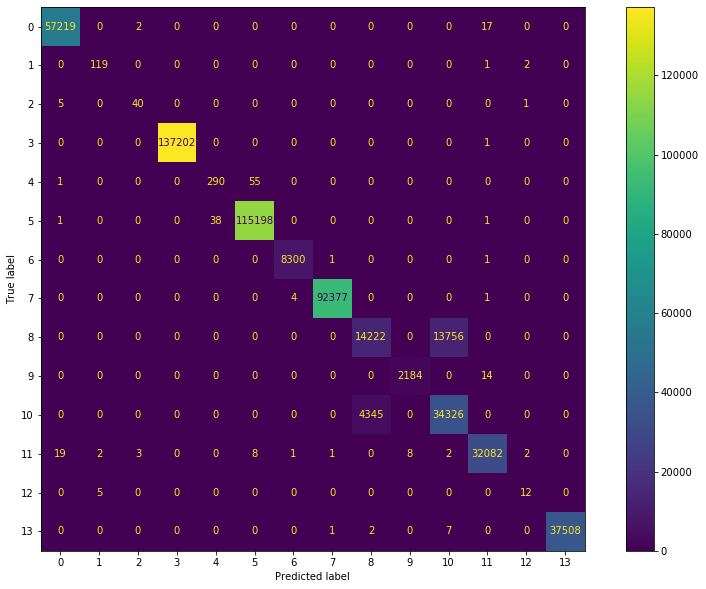

In [114]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = plot_confusion_matrix(classifier1 , x_test , y_test , ax=ax)

plt.show(matrix)
plt.show()

# 3- Naive Bayes

In [91]:
NB_cls = MultinomialNB()

In [92]:
# fit model
NB_cls.fit(x_train, y_train)


MultinomialNB()

In [93]:
# predict
y_predicted_nb = NB_cls.predict(x_test)


/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


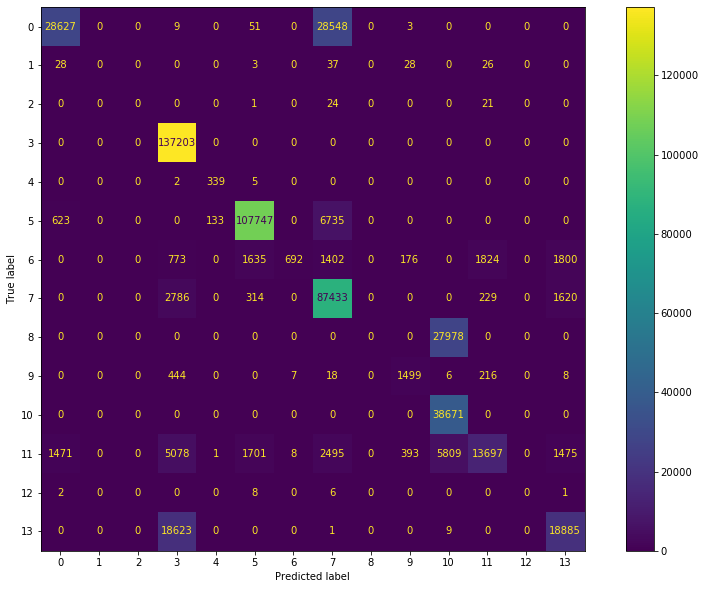

In [94]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = plot_confusion_matrix(NB_cls , x_test , y_test , ax=ax)

plt.show(matrix)

In [95]:
precision, recall, fscore, support = score(y_test, y_predicted_nb)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}

/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
confusion_nb_1 = pd.crosstab(y_test, y_test)
confusion_nb_1

label_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13
label_cat,,,,,,,,,,,,,,
0,57238,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,122,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,46,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,137203,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,346,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,115238,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,8302,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,92382,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,27978,0,0,0,0,0


In [97]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DDOS attack-HOIC,0.930929,0.500140,0.650695
1,DDoS attacks-LOIC-HTTP,0.000000,0.000000,0.000000
2,DoS attacks-Hulk,0.000000,0.000000,0.000000
3,Bot,0.831947,1.000000,0.908265
4,FTP-BruteForce,0.716702,0.979769,0.827839
5,SSH-Bruteforce,0.966644,0.934995,0.950556
6,Infilteration,0.978784,0.083353,0.153624
7,DoS attacks-SlowHTTPTest,0.690084,0.946429,0.798180
8,DoS attacks-GoldenEye,0.000000,0.000000,0.000000
9,DoS attacks-Slowloris,0.714150,0.681984,0.697696


In [98]:
print("Classification Report")
print(classification_report(y_test, y_predicted_nb))

Classification Report


/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.50      0.65     57238
           1       0.00      0.00      0.00       122
           2       0.00      0.00      0.00        46
           3       0.83      1.00      0.91    137203
           4       0.72      0.98      0.83       346
           5       0.97      0.93      0.95    115238
           6       0.98      0.08      0.15      8302
           7       0.69      0.95      0.80     92382
           8       0.00      0.00      0.00     27978
           9       0.71      0.68      0.70      2198
          10       0.53      1.00      0.70     38671
          11       0.86      0.43      0.57     32128
          12       0.00      0.00      0.00        17
          13       0.79      0.50      0.62     37518

    accuracy                           0.79    549387
   macro avg       0.57      0.50      0.49    549387
weighted avg       0.78      0.79      0.76    549387



/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4- Random Forest

In [99]:
forest =  RandomForestClassifier()

In [100]:
#fit
forest.fit(x_train, y_train)


RandomForestClassifier()

In [101]:
# predict
y_predicted_f = forest.predict(x_test)


/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


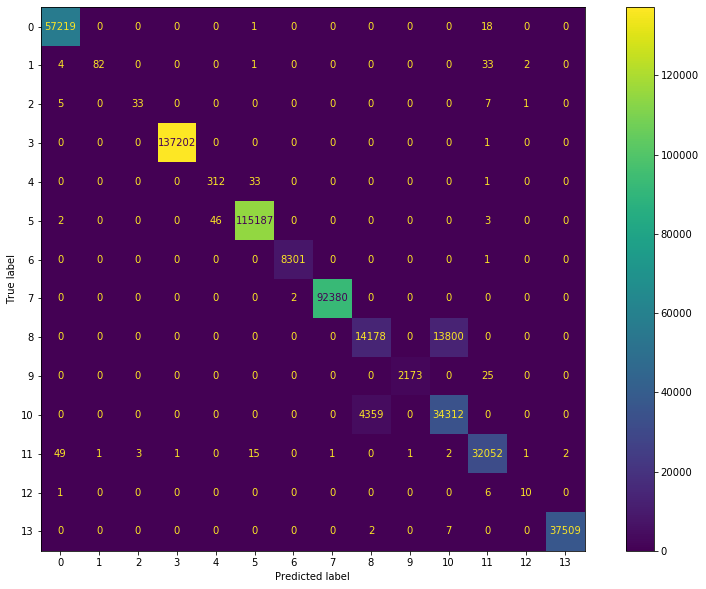

In [102]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = plot_confusion_matrix(forest , x_test , y_test , ax=ax)

plt.show(matrix)
plt.show()

In [40]:
precision, recall, fscore, support = score(y_test, y_predicted_f)
d = {'attack': attack, 'precision': precision, 
     'recall' : recall, 'fscore': fscore}

In [41]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DDOS attack-HOIC,0.999214,0.999633,0.999424
1,DDoS attacks-LOIC-HTTP,0.987952,0.672131,0.800000
2,DoS attacks-Hulk,0.891892,0.717391,0.795181
3,Bot,0.999993,0.999993,0.999993
4,FTP-BruteForce,0.872576,0.910405,0.891089
5,SSH-Bruteforce,0.999601,0.999540,0.999570
6,Infilteration,0.999759,0.999880,0.999819
7,DoS attacks-SlowHTTPTest,0.999989,0.999978,0.999984
8,DoS attacks-GoldenEye,0.764655,0.506791,0.609574
9,DoS attacks-Slowloris,0.999540,0.988626,0.994053


In [103]:
print("Classification Report")
print(classification_report(y_test, y_predicted_f))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.99      0.67      0.80       122
           2       0.92      0.72      0.80        46
           3       1.00      1.00      1.00    137203
           4       0.87      0.90      0.89       346
           5       1.00      1.00      1.00    115238
           6       1.00      1.00      1.00      8302
           7       1.00      1.00      1.00     92382
           8       0.76      0.51      0.61     27978
           9       1.00      0.99      0.99      2198
          10       0.71      0.89      0.79     38671
          11       1.00      1.00      1.00     32128
          12       0.71      0.59      0.65        17
          13       1.00      1.00      1.00     37518

    accuracy                           0.97    549387
   macro avg       0.93      0.88      0.89    549387
weighted avg       0.97      0.97      0.96    549387



# 5- GradientBoosting

In [39]:
confusion_rf_1 = pd.crosstab(y_test, y_predicted)
confusion_rf_1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
label_cat,,,,,,,,,,,,,,
0,57217,0,0,0,0,1,0,0,0,0,0,20,0,0
1,4,82,0,0,0,1,0,0,0,0,0,33,2,0
2,5,0,33,0,0,0,0,0,0,0,0,7,1,0
3,0,0,0,137202,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,315,30,0,0,0,0,0,1,0,0
5,2,0,0,0,46,115185,0,0,0,0,0,5,0,0
6,0,0,0,0,0,0,8301,0,0,0,0,1,0,0
7,0,0,0,0,0,0,2,92380,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,14179,0,13799,0,0,0


In [42]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
'''
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(x_test, y_test)))
    '''

'\nlr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]\n\nfor learning_rate in lr_list:\n    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)\n    gb_clf.fit(x_train, y_train)\n\n    print("Learning rate: ", learning_rate)\n    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))\n    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(x_test, y_test)))\n    '

In [44]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.1, 
                                     max_features=2,
                                     max_depth=2, 
                                     random_state=0)

gb_clf2.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=20,
                           random_state=0)

In [45]:
prediction_gb = gb_clf2.predict(x_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_predicted)

d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

In [46]:
print("Classification Report")
print(classification_report(y_test, prediction_gb))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     57238
           1       0.62      0.23      0.34       122
           2       0.38      0.46      0.41        46
           3       0.89      0.97      0.93    137203
           4       0.00      0.00      0.00       346
           5       0.97      0.99      0.98    115238
           6       0.20      0.03      0.05      8302
           7       0.91      0.98      0.94     92382
           8       0.66      0.41      0.51     27978
           9       0.00      0.00      0.00      2198
          10       0.64      0.90      0.75     38671
          11       0.95      0.46      0.62     32128
          12       0.00      0.24      0.00        17
          13       0.97      1.00      0.98     37518

    accuracy                           0.88    549387
   macro avg       0.58      0.53      0.53    549387
weighted avg       0.88      0.88      0.87    549387



/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


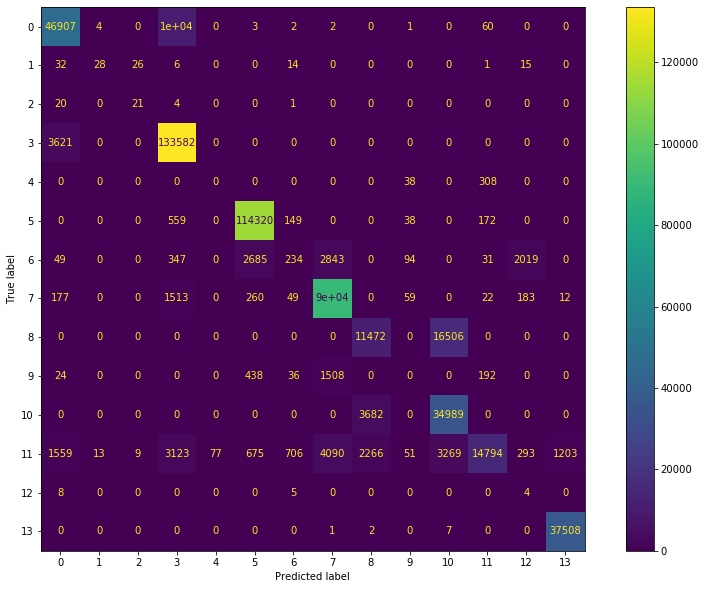

In [67]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = plot_confusion_matrix(gb_clf2 , x_test , y_test , ax=ax)

plt.show(matrix)
plt.show()

# 6- xgboost

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
import xgboost as xgb

In [49]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

/home/upm/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
prediction = xgb_clf.predict(x_test)

In [51]:
score = xgb_clf.score(x_test, prediction)
print(score)

1.0


In [52]:
print("Classification Report")
print(classification_report(y_test, prediction))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.95      0.96      0.96       122
           2       0.93      0.83      0.87        46
           3       1.00      1.00      1.00    137203
           4       0.90      0.93      0.92       346
           5       1.00      1.00      1.00    115238
           6       1.00      1.00      1.00      8302
           7       1.00      1.00      1.00     92382
           8       0.77      0.51      0.61     27978
           9       1.00      0.99      0.99      2198
          10       0.71      0.89      0.79     38671
          11       1.00      1.00      1.00     32128
          12       0.79      0.65      0.71        17
          13       1.00      1.00      1.00     37518

    accuracy                           0.97    549387
   macro avg       0.93      0.91      0.92    549387
weighted avg       0.97      0.97      0.97    549387



In [ ]:
precision, recall, fscore, support = score(y_test, y_predicted)

d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

/home/upm/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


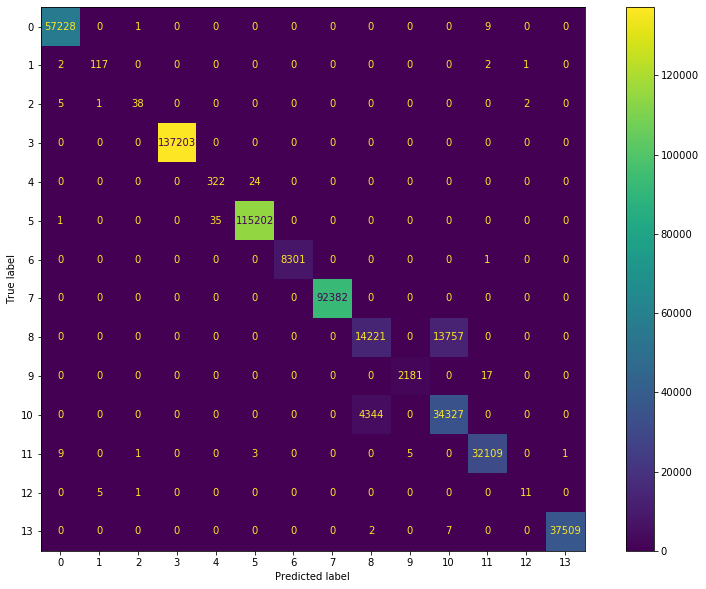

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))
matrix = plot_confusion_matrix(xgb_clf , x_test , y_test , ax=ax)

plt.show(matrix)
plt.show()

In [53]:
#y.to_csv(r"E:\Multi_pred_Y.csv",index=False, header=True)

In [54]:
#y.to_csv(r"E:\B_pred_Y.csv",index=False, header=True)